In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
df = pd.read_csv("netflix_titles.csv", encoding='latin1')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
df['type'].value_counts()


type
Movie      6131
TV Show    2676
Name: count, dtype: int64

C:\Users\kenih\AppData\Local\Temp\ipykernel_27444\3624187368.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


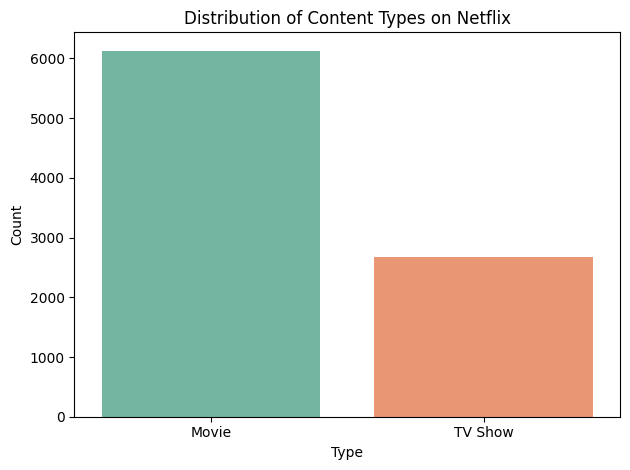

In [6]:
sns.countplot(x='type', data=df, palette='Set2')
plt.title('Distribution of Content Types on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('charts/content_type_distribution.png')
plt.show()


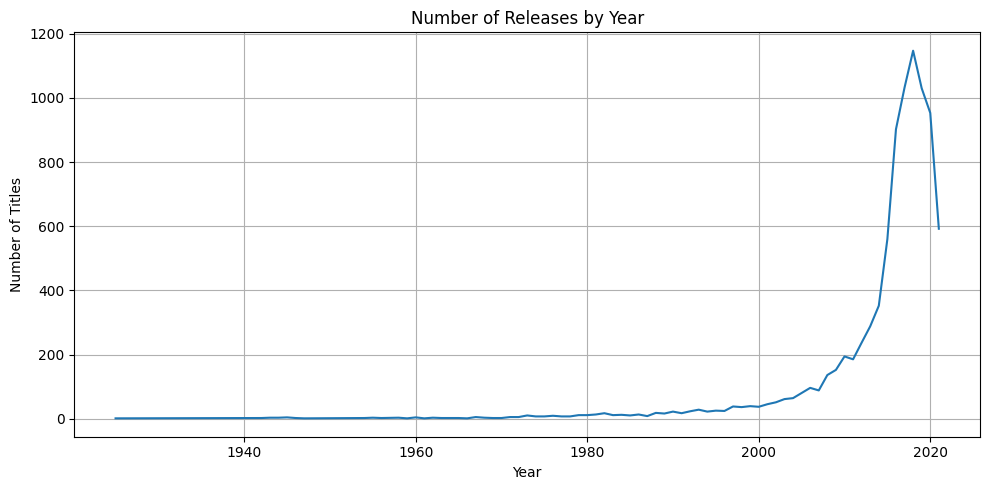

In [7]:
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(10,5))
plt.title('Number of Releases by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.tight_layout()
plt.savefig('charts/releases_by_year.png')
plt.show()


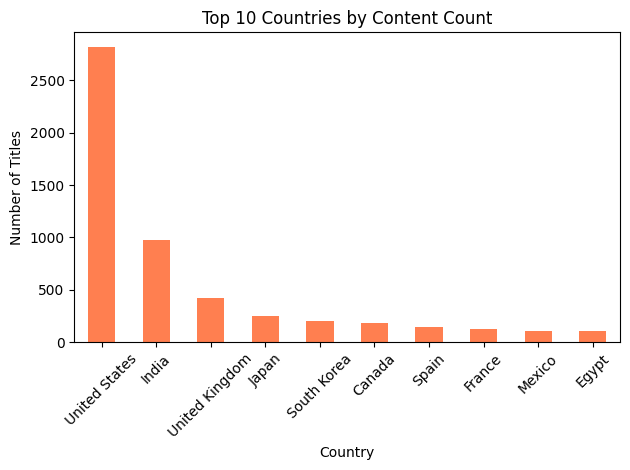

In [8]:
df['country'].value_counts().head(10).plot(kind='bar', color='coral')
plt.title('Top 10 Countries by Content Count')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('charts/top_countries.png')
plt.show()


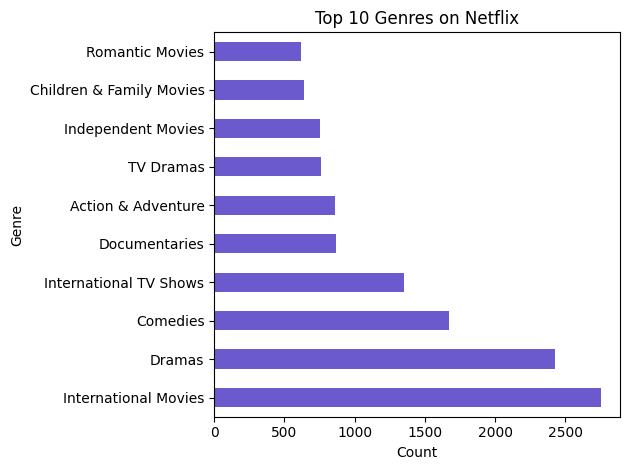

In [9]:
from collections import Counter

all_genres = df['listed_in'].dropna().apply(lambda x: x.split(', '))
flat_genre_list = [genre for sublist in all_genres for genre in sublist]

genre_counts = pd.Series(Counter(flat_genre_list)).sort_values(ascending=False)

genre_counts.head(10).plot(kind='barh', color='slateblue')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.savefig('charts/top_genres.png')
plt.show()


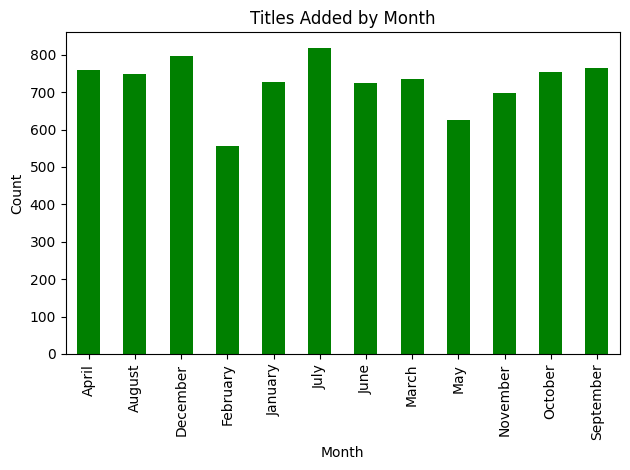

In [14]:
# titles added per month
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['month_added'] = df['date_added'].dt.month_name()

# можно сгруппировать
df['month_added'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Titles Added by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('charts/monthly_additions.png')
plt.show()


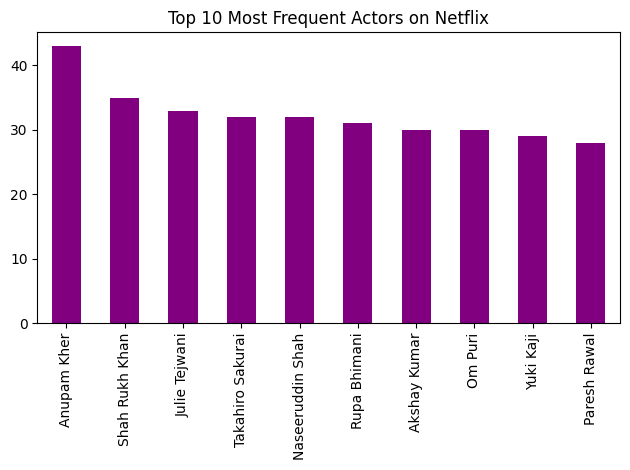

In [11]:
from collections import Counter

all_cast = df['cast'].dropna().apply(lambda x: x.split(', '))
flat_cast = [actor for sublist in all_cast for actor in sublist]
pd.Series(Counter(flat_cast)).sort_values(ascending=False).head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Most Frequent Actors on Netflix')
plt.tight_layout()
plt.savefig('charts/top_actors.png')
plt.show()


<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\kenih\AppData\Local\Temp\ipykernel_27444\1406466217.py:3: SyntaxWarning: invalid escape sequence '\d'
  movies['duration_mins'] = movies['duration'].str.extract('(\d+)').astype(float)


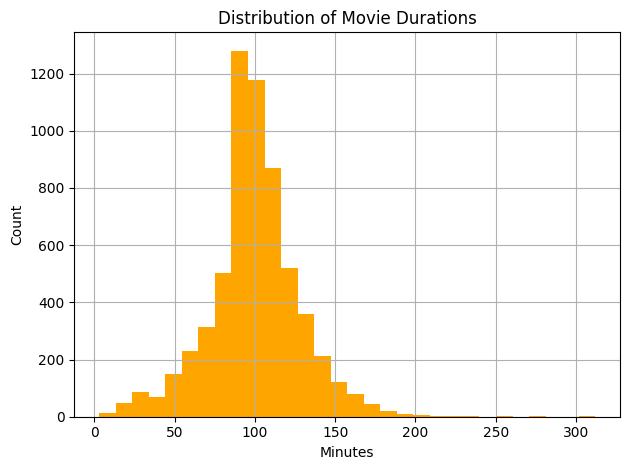

In [12]:
# только фильмы
movies = df[df['type'] == 'Movie'].copy()
movies['duration_mins'] = movies['duration'].str.extract('(\d+)').astype(float)

movies['duration_mins'].hist(bins=30, color='orange')
plt.title('Distribution of Movie Durations')
plt.xlabel('Minutes')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('charts/movie_durations.png')
plt.show()


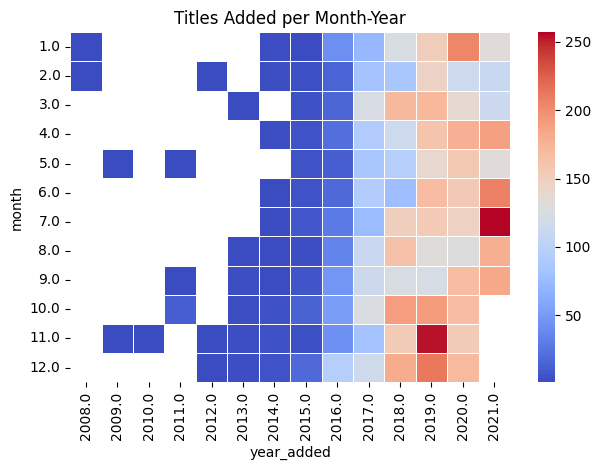

In [15]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month

heat = df.pivot_table(index='month', columns='year_added', values='show_id', aggfunc='count')
sns.heatmap(heat, cmap='coolwarm', linewidths=0.5)
plt.title('Titles Added per Month-Year')
plt.tight_layout()
plt.savefig('charts/heatmap_month_year.png')
plt.show()
